In [5]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
from classy import Class
from scipy.optimize import fsolve
from math import pi

In [6]:
# Variable wished to determine
var_name = ['h','wa_fld']
var_array = [np.linspace(0.6776,0.679,15), np.linspace(-0.07,0.07,15)]
var_num = [len(var_array[0]), len(var_array[1])]
var_legend = [r'$h$', r'$N_{eff}$']
var_figname = ['h', 'N_eff']

# Fixed settings
common_settings = {# LambdaCDM parameters
                   'recombination': 'RECFAST',
                   'Omega_fld': 0.679,
                   'w0_fld':-1.,
                   # output and precision parameters
                   'output':'tCl,pCl,lCl,mPk',
                   }

#Other variables
twopi = 2.*pi

# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [7]:
#standard spectrum for LambaCDM
LambdaCDM = Class()
# pass inicial parameters
LambdaCDM.set({'recombination': 'RECFAST',
               'output':'tCl,pCl,lCl,mPk'})
# run class
LambdaCDM.compute()

# get Cls
clM = LambdaCDM.raw_cl(2500)
ll = clM['ell'][2:]
clTT = clM['tt'][2:]
clEE = clM['ee'][2:]
clPP = clM['pp'][2:]

tCl_Lambda = clTT*ll*(ll+1)/twopi

In [8]:
#Deviation of data
chi2 = np.empty([var_num[0],var_num[1]])

M = Class()
# loop over varying parameter values
for i,var0 in enumerate(var_array[0]):
    print (' * Compute with %s=%f'%(var_name[0],var0))
    color = (1*i/len(var_array[0]),0.0,0.3)

    for j,var1 in enumerate(var_array[1]):
        print ('\t * Compute with %s=%f'%(var_name[1],var1))
        # call CLASS
        M.set(common_settings)
        M.set({var_name[0]:var0,
               var_name[1]:var1})
        M.compute()

        # get Cls
        clM = M.raw_cl(2500)
        ll = clM['ell'][2:]
        clTT = clM['tt'][2:]
        clEE = clM['ee'][2:]
        clPP = clM['pp'][2:]

        tCl = clTT*ll*(ll+1)/twopi

        #Sum over the deviation of cl
        chi2[i][j] = sum((tCl-tCl_Lambda)*(tCl-tCl_Lambda))

        # reset CLASS
        M.empty()

    # reset CLASS
    M.empty()

 * Compute with h=0.677600
	 * Compute with wa_fld=-0.070000
	 * Compute with wa_fld=-0.060000
	 * Compute with wa_fld=-0.050000
	 * Compute with wa_fld=-0.040000
	 * Compute with wa_fld=-0.030000
	 * Compute with wa_fld=-0.020000
	 * Compute with wa_fld=-0.010000
	 * Compute with wa_fld=0.000000
	 * Compute with wa_fld=0.010000
	 * Compute with wa_fld=0.020000
	 * Compute with wa_fld=0.030000
	 * Compute with wa_fld=0.040000
	 * Compute with wa_fld=0.050000
	 * Compute with wa_fld=0.060000
	 * Compute with wa_fld=0.070000
 * Compute with h=0.677700
	 * Compute with wa_fld=-0.070000
	 * Compute with wa_fld=-0.060000
	 * Compute with wa_fld=-0.050000
	 * Compute with wa_fld=-0.040000
	 * Compute with wa_fld=-0.030000
	 * Compute with wa_fld=-0.020000
	 * Compute with wa_fld=-0.010000
	 * Compute with wa_fld=0.000000
	 * Compute with wa_fld=0.010000
	 * Compute with wa_fld=0.020000
	 * Compute with wa_fld=0.030000
	 * Compute with wa_fld=0.040000
	 * Compute with wa_fld=0.050000
	 * Comp

In [9]:
#calculate chi2 minimum
min_chi2 = []
for i,chi2_var in enumerate(chi2):
    min_chi2.append(min(chi2_var))

#output value for h and N_eff minimum
var_min_index = np.array(np.where(chi2 == min(min_chi2)), dtype=int)
var_min0 = var_array[0][var_min_index[0][0]]
var_min1 = var_array[1][var_min_index[1][0]]

print('Experimental value of', var_name[0], '=', np.round(var_min0,4), '\n'
      'Experimental value of', var_name[1], '=', np.round(var_min1,3))

Experimental value of h = 0.6781 
Experimental value of wa_fld = 0.0


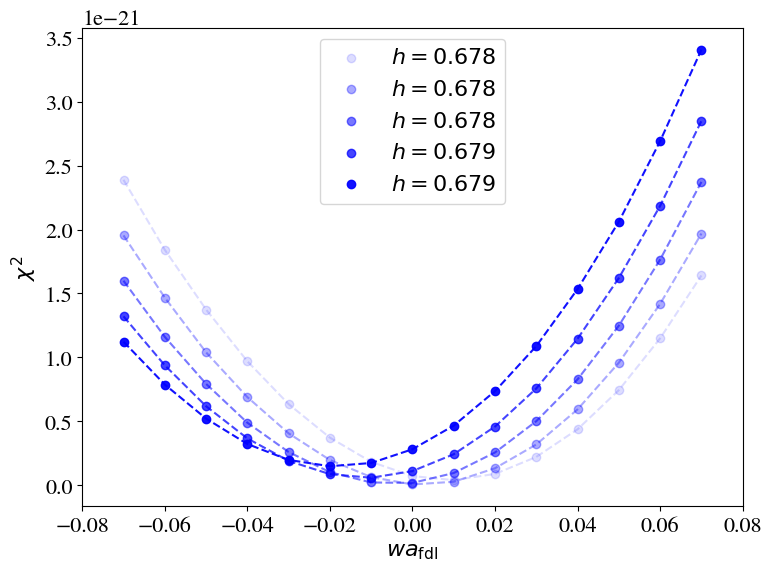

In [13]:
#Error figure
fig1_err, ax1_err = plt.subplots()

#plot chi2 error varying h
for i in range(1,var_num[0],3):
    chi2_var = []
    for j in range(0,var_num[1]):
        chi2_var.append(chi2[i][j])
    ax1_err.scatter(var_array[1], chi2_var, color='b', 
                alpha = 1*(i+1)/len(var_array[0]), label=r'$%s=%s$'%(var_name[0],str(np.round(var_array[0][i],3))))
    ax1_err.plot(var_array[1], chi2_var, color='b', linestyle = '--', alpha = 1*(i+1)/len(var_array[0]))

# output chi2 error figure
ax1_err.set_xlim([-0.08,0.08])
ax1_err.set_xlabel(r'$wa_\mathrm{fdl}$')
ax1_err.set_ylabel(r'$\chi^2$')
ax1_err.legend()
fig1_err.tight_layout()
#fig1_err.savefig('TFG05.2.1.png')

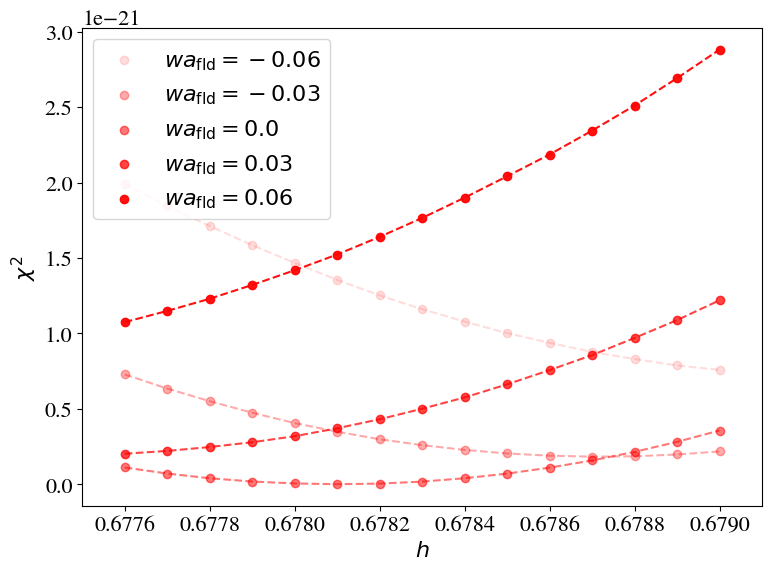

In [14]:
#Error figure
fig2_err, ax2_err = plt.subplots()

#plot chi2 error varying N_eff
for i in range(1,var_num[1],3):
    chi2_var = []
    for j in range(0,var_num[0]):
        chi2_var.append(chi2[j][i])
    ax2_err.scatter(var_array[0], chi2_var, color='r', 
                alpha = 1*(i+1)/len(var_array[0]), label=r'$wa_\mathrm{fld}=%s$'%str(np.round(var_array[1][i],3)))
    ax2_err.plot(var_array[0], chi2_var, color='r', linestyle = '--', alpha = 1*(i+1)/len(var_array[0]))

# output chi2 error figure
ax2_err.set_xlim([0.6775,0.6791])
ax2_err.set_xlabel(r'$h$')
ax2_err.set_ylabel(r'$\chi^2$')
ax2_err.legend()
fig2_err.tight_layout()
#fig2_err.savefig('TFG04.2.png')

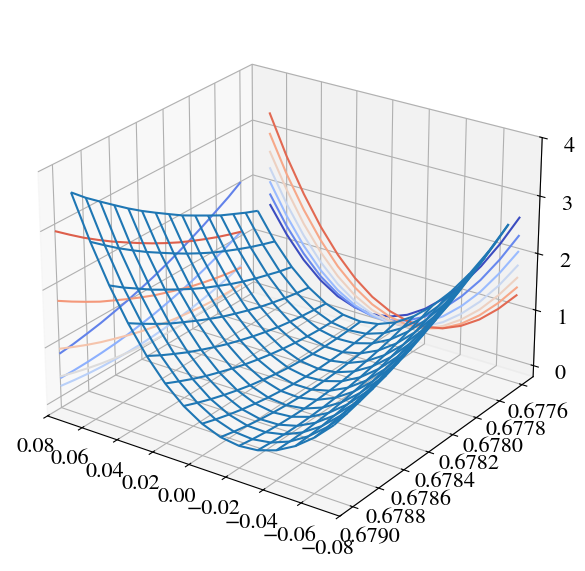

In [21]:
#Error figure in 3D
fig_3d = plt.figure()
ax_3d = fig_3d.add_subplot(projection = '3d')

#meshgrid for 3d plotting
x,y = np.meshgrid(var_array[1], var_array[0])

#plot 3d chi2 error
ax_3d.plot_wireframe(x, y, chi2)
ax_3d.contour(x,y,chi2, zdir='x', offset=0.08, cmap='coolwarm')
ax_3d.contour(x,y,chi2, zdir='y', offset=0.6775, cmap='coolwarm')

#output of figure in 3D

ax_3d.view_init(elev=25, azim=125, roll=0)
ax_3d.set_ylim([0.6775,0.6791])
ax_3d.set_xlim([-0.08,0.08])
ax_3d.set_zlim([-0.2e-21,4e-21])
fig_3d.tight_layout()
#fig_3d.savefig('TFG04.3.png')